In [1]:
# Objective:
# The objective of this assignment is to apply Decision Tree Classification to a given dataset, 
# analyse the performance of the model, and interpret the results.

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset

df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.shape

(908, 13)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,normal,4


In [8]:
# Encoding categorical variables

# Identifying categorical columns

df_categorical_only = df.select_dtypes(include=np.object)
df_categorical_only

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\419416527.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical_only = df.select_dtypes(include=np.object)


,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,normal
904,Male,asymptomatic,st-t abnormality,TRUE,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,fixed defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,normal


In [9]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex','cp','restecg','exang','slope','thal']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.5,2,1,4
904,62,1,0,166,170,False,2,120,1,3.0,1,2,4
905,56,1,2,170,0,False,0,123,1,2.5,0,0,4
906,56,1,2,144,208,True,2,105,2,NaN,0,1,4


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.991189,135.957048,0.450441,0.891253,1.155286,1.158590,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.635177,26.804929,0.572013,1.093875,0.691023,0.747774,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,2.000000,202.000000,2.000000,6.200000,2.000000,2.000000,4.000000


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

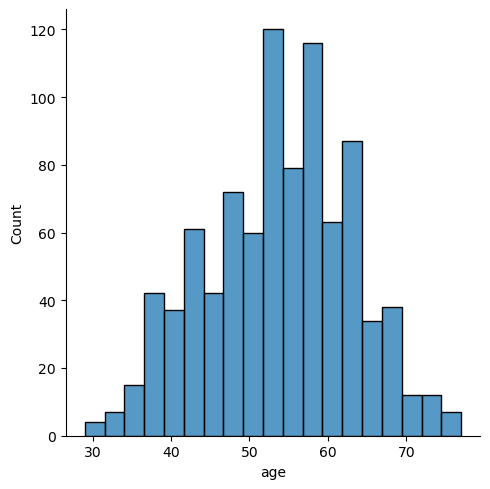

In [12]:
# Visualizations

sns.displot(df['age'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

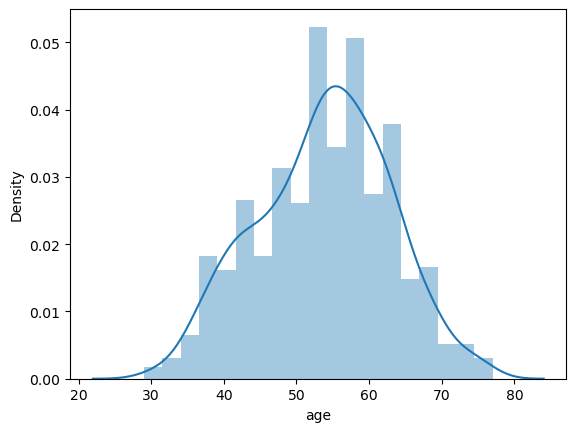

In [13]:
sns.distplot(df['age'])

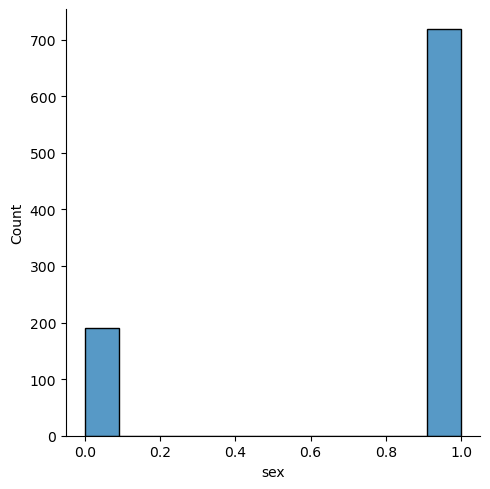

In [14]:
sns.displot(df['sex'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\2062954179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'])


<Axes: xlabel='sex', ylabel='Density'>

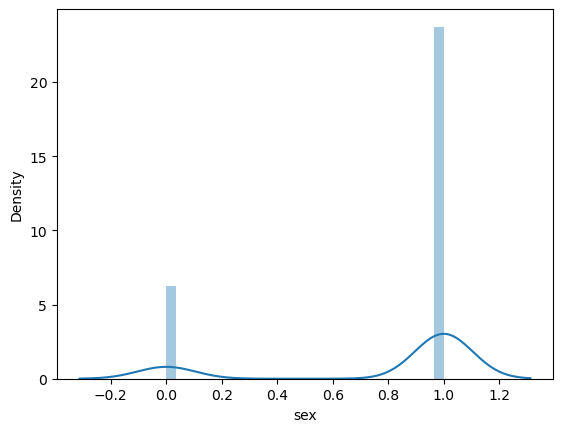

In [15]:
sns.distplot(df['sex'])

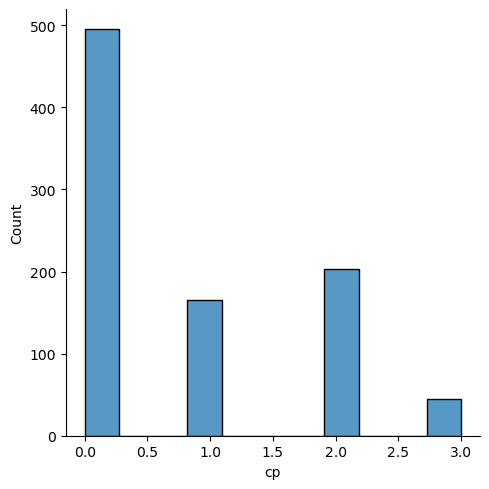

In [16]:
sns.displot(df['cp'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\1383348308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cp'])


<Axes: xlabel='cp', ylabel='Density'>

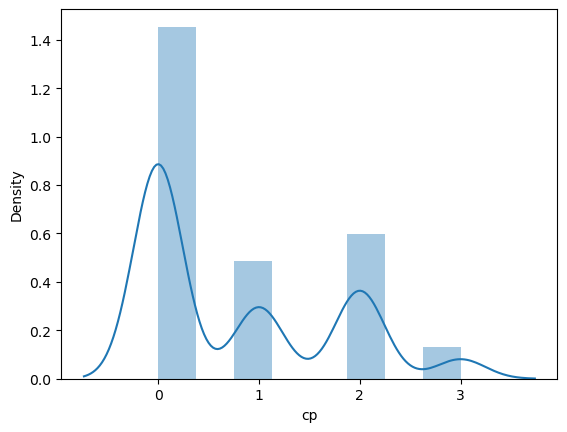

In [17]:
sns.distplot(df['cp'])

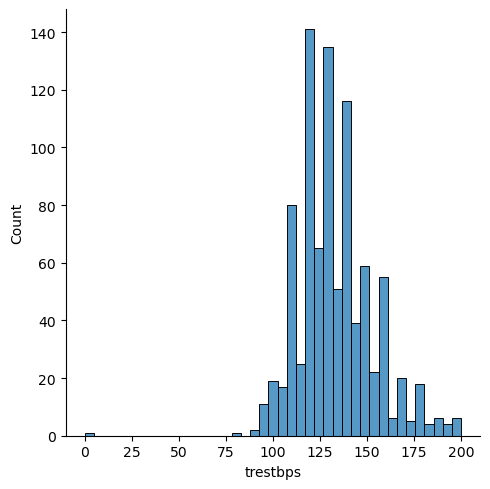

In [18]:
sns.displot(df['trestbps'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\4083993200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'])


<Axes: xlabel='trestbps', ylabel='Density'>

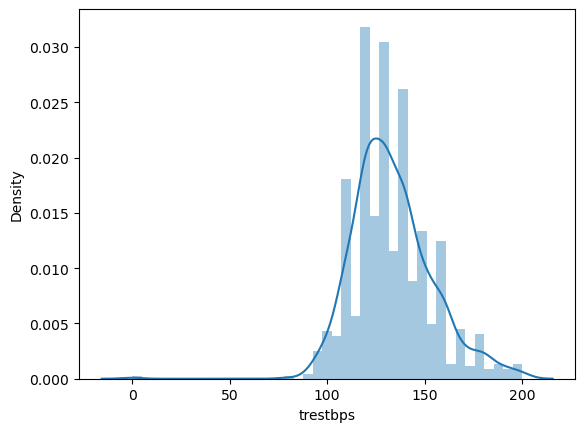

In [19]:
sns.distplot(df['trestbps'])

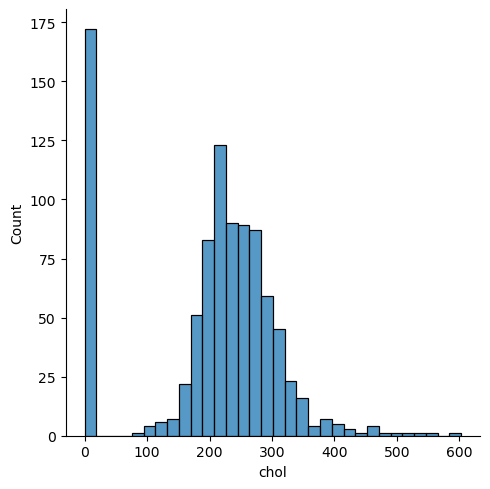

In [20]:
sns.displot(df['chol'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\1384229396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])


<Axes: xlabel='chol', ylabel='Density'>

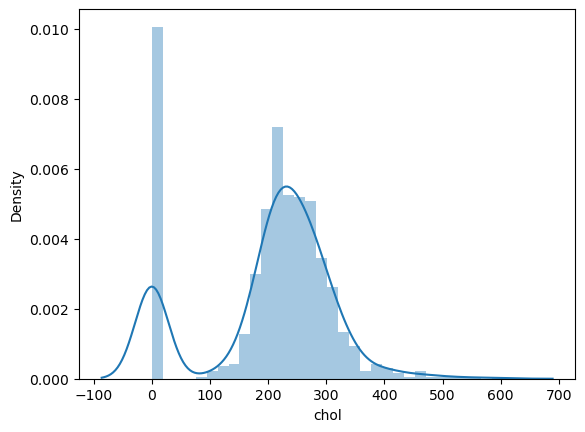

In [21]:
sns.distplot(df['chol'])

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


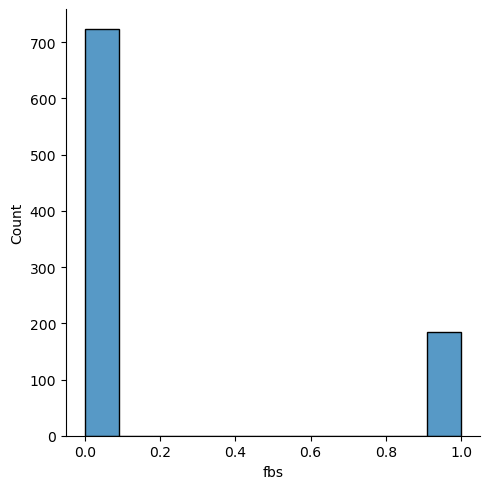

In [22]:
sns.displot(df['fbs'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\2906046708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fbs'])


<Axes: xlabel='fbs', ylabel='Density'>

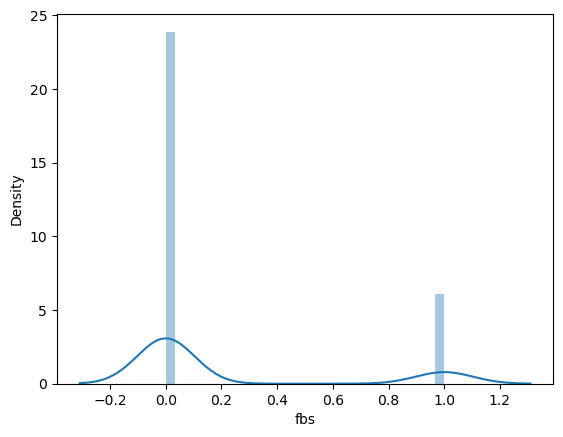

In [23]:
sns.distplot(df['fbs'])

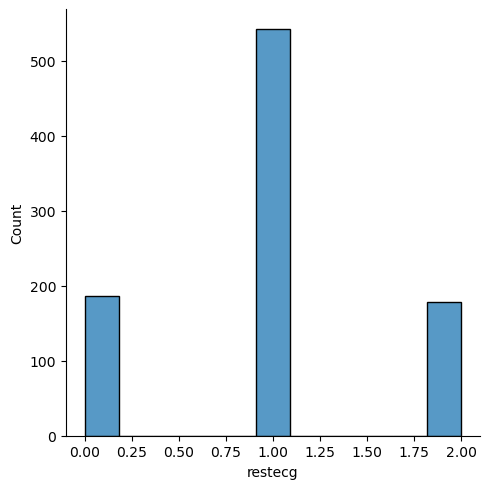

In [24]:
sns.displot(df['restecg'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\860441592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['restecg'])


<Axes: xlabel='restecg', ylabel='Density'>

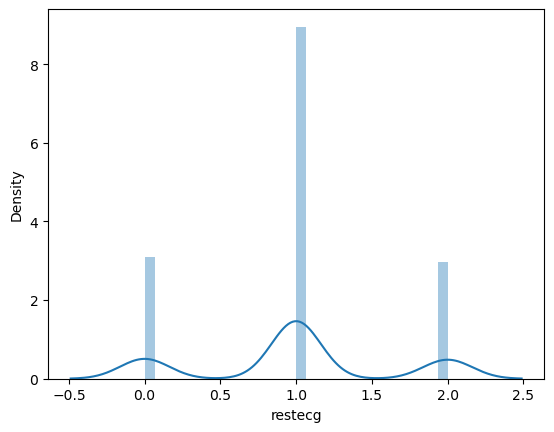

In [25]:
sns.distplot(df['restecg'])

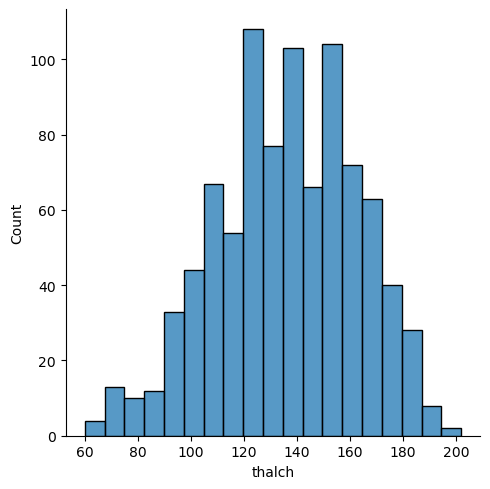

In [26]:
sns.displot(df['thalch'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\129031119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalch'])


<Axes: xlabel='thalch', ylabel='Density'>

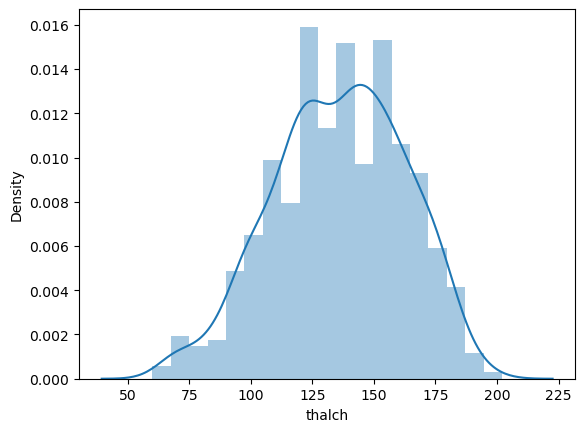

In [27]:
sns.distplot(df['thalch'])

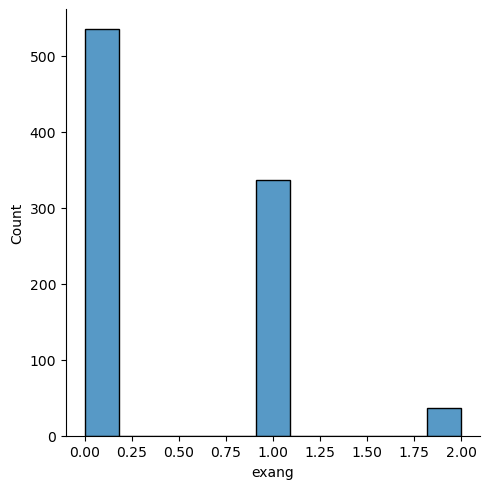

In [28]:
sns.displot(df['exang'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\159298986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['exang'])


<Axes: xlabel='exang', ylabel='Density'>

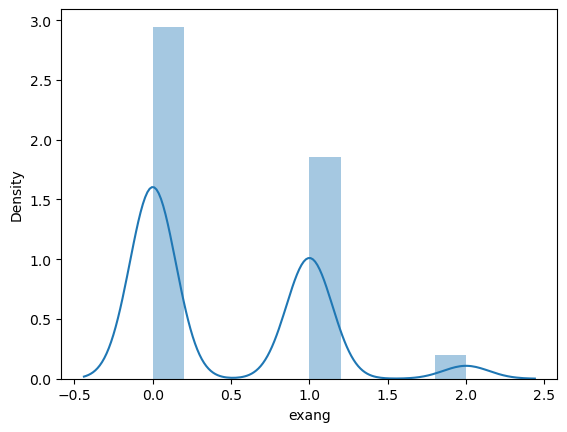

In [29]:
sns.distplot(df['exang'])

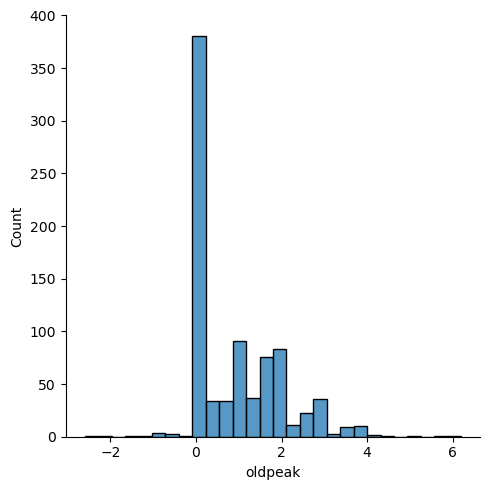

In [30]:
sns.displot(df['oldpeak'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\4027899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldpeak'])


<Axes: xlabel='oldpeak', ylabel='Density'>

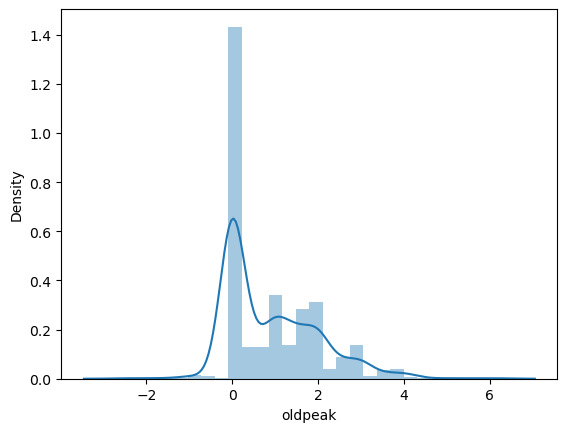

In [31]:
sns.distplot(df['oldpeak'])

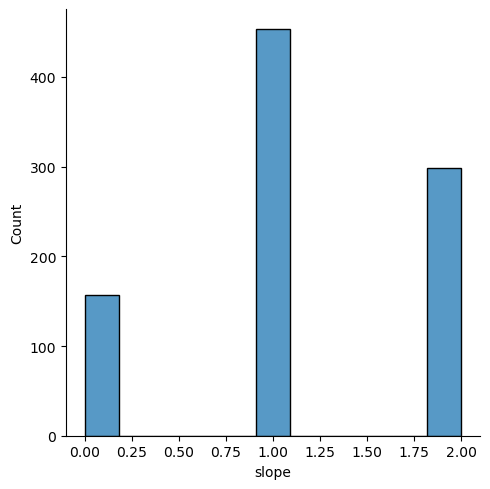

In [32]:
sns.displot(df['slope'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\1454630552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slope'])


<Axes: xlabel='slope', ylabel='Density'>

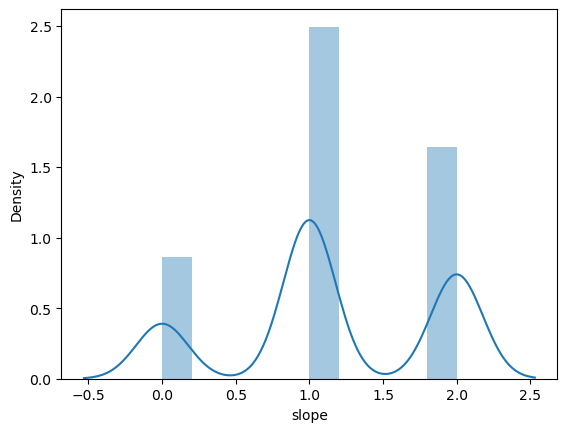

In [33]:
sns.distplot(df['slope'])

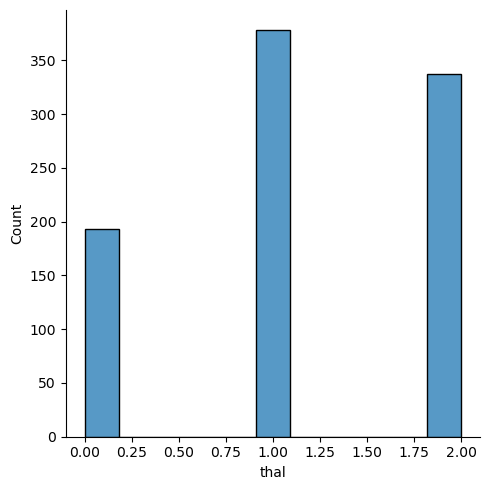

In [34]:
sns.displot(df['thal'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\1118203355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thal'])


<Axes: xlabel='thal', ylabel='Density'>

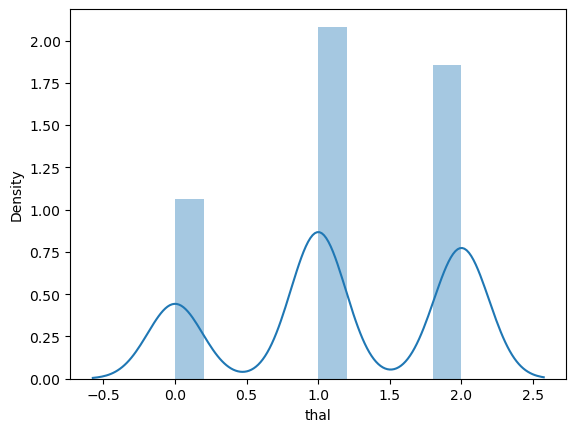

In [35]:
sns.distplot(df['thal'])

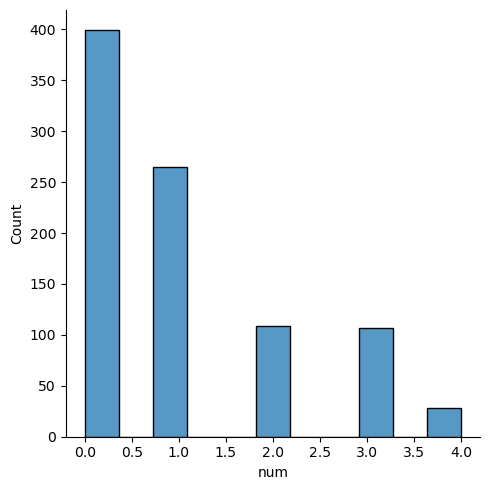

In [36]:
sns.displot(df['num'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21716\2101089782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num'])


<Axes: xlabel='num', ylabel='Density'>

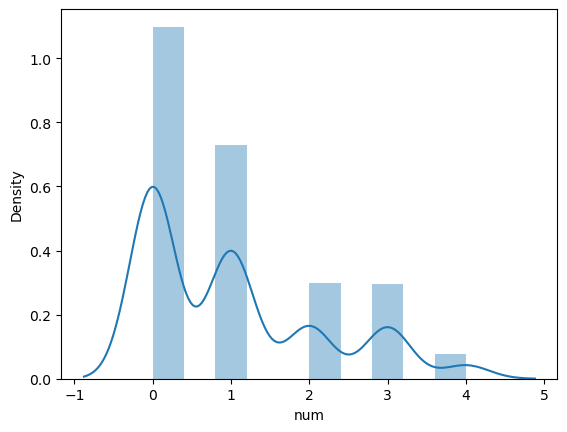

In [37]:
sns.distplot(df['num'])

In [38]:
# Handling missing values

df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [39]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [40]:
# There are 62 null values in oldpeak column

# Fill missing values using mean of that column
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [41]:
df.isnull().sum()

# No null values now

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [42]:
# Standard scaling

# Identifying numerical columns

df_numerics_only = df.select_dtypes(include=np.number)

from sklearn.preprocessing import StandardScaler

for col in df_numerics_only:
    ss = StandardScaler()
    df_numerics_only[col] = ss.fit_transform(df_numerics_only[[col]])
    
df_numerics_only

,age,sex,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,0.514416,2.320276,0.567394,0.281297,-1.561352,0.524183,-0.787899,1.334996e+00,-1.672770,-1.55024,-0.881977
1,-1.397560,0.514416,0.232258,0.076967,0.013526,0.013879,-0.147705,-0.787899,-8.445938e-01,-0.224843,-1.55024,-0.881977
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,0.013879,0.449529,-0.787899,-4.655347e-01,-0.224843,-1.55024,-0.881977
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-1.561352,2.017268,-0.787899,-8.445938e-01,-0.224843,-1.55024,-0.881977
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,0.013879,-0.371668,0.961275,5.768777e-01,-0.224843,-1.55024,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.811752,-0.413461,-1.798388,0.013879,-0.595631,-0.787899,5.768777e-01,1.223083,-0.21220,2.615119
904,0.896773,0.514416,-0.811752,1.597292,-0.281021,1.589110,-0.595631,0.961275,1.998349e+00,-0.224843,1.12584,2.615119
905,0.241249,0.514416,1.276267,1.793463,-1.798388,-1.561352,-0.483649,0.961275,1.524525e+00,-1.672770,-1.55024,2.615119
906,0.241249,0.514416,1.276267,0.518352,0.058155,1.589110,-1.155538,2.710449,-1.052100e-16,-1.672770,-0.21220,2.615119


In [43]:
# Correlation matrix

corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.232718,-0.054644,0.079046,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.101209,-0.045065,0.025838,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.170467,0.092177,-0.096869,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.152162,0.006748,0.050227,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.028744,0.047292,-0.038851,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.022756,-0.026636,0.031686,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.031561,-0.084796,-0.099191,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.128728,0.224048,-0.013026,-0.323058
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.318034,-0.149261,0.049327,0.327403
oldpeak,0.232718,0.101209,-0.170467,0.152162,0.028744,0.022756,-0.031561,-0.128728,0.318034,1.000000,-0.184895,0.078503,0.416580


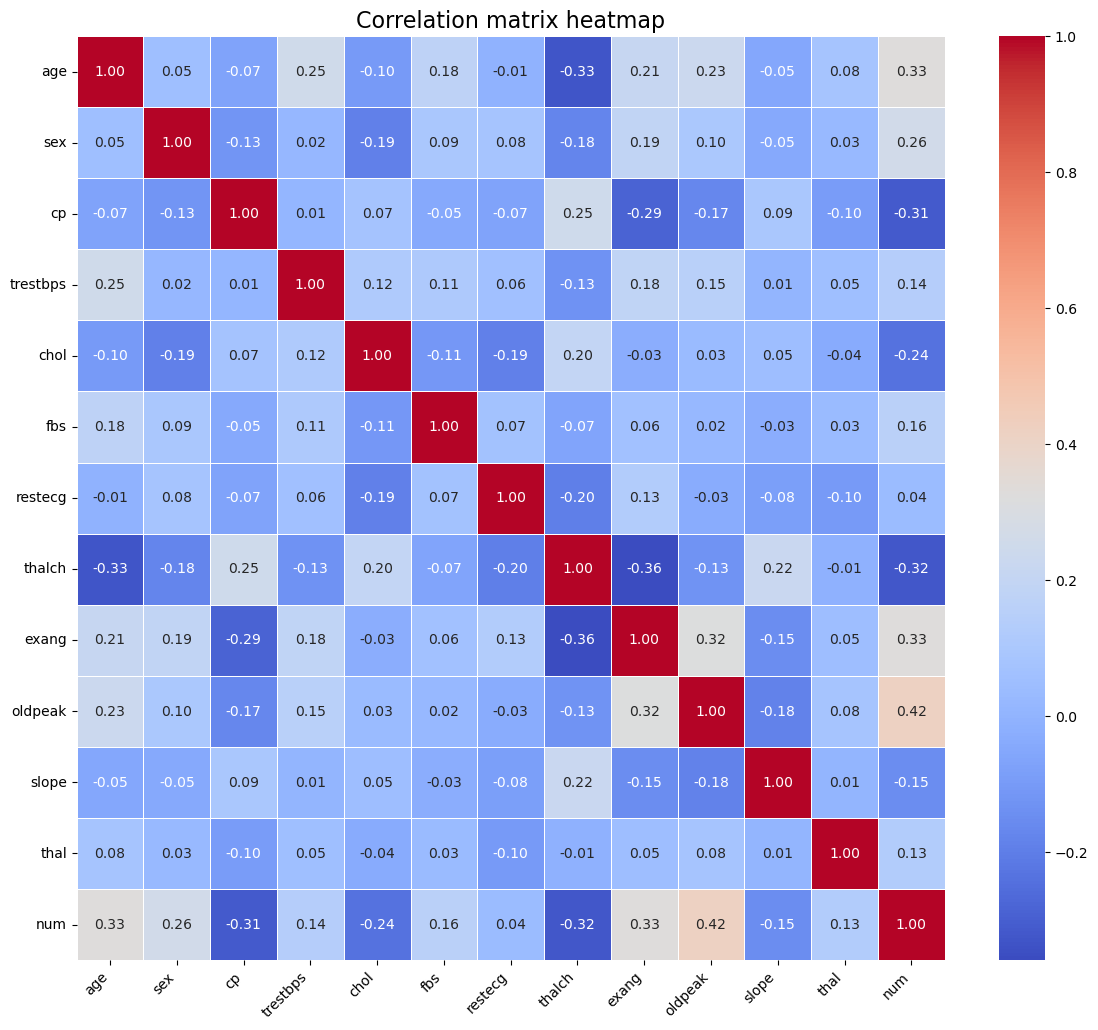

In [44]:
# Create the heatmap

plt.figure(figsize = (14,12))

sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation matrix heatmap', fontsize=16)
plt.show()

In [45]:
# Feature selection

x = df.drop('num',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.300000,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1
904,62,1,0,166,170,False,2,120,1,3.000000,1,2
905,56,1,2,170,0,False,0,123,1,2.500000,0,0
906,56,1,2,144,208,True,2,105,2,0.891253,0,1


In [46]:
y = df['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [47]:
# Split the data into training and testing datasets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
# Train the decision tree classifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Make the predictions

y_pred = model.predict(x_test)

In [50]:
# Evaluate the model

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy:0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        89
           1       0.34      0.33      0.34        48
           2       0.33      0.27      0.30        22
           3       0.15      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.31      0.30      0.31       182
weighted avg       0.49      0.50      0.50       182

Confusion Matrix:
[[66 15  4  4  0]
 [19 16  5  8  0]
 [ 4  4  6  5  3]
 [ 3  8  1  3  2]
 [ 0  4  2  0  0]]


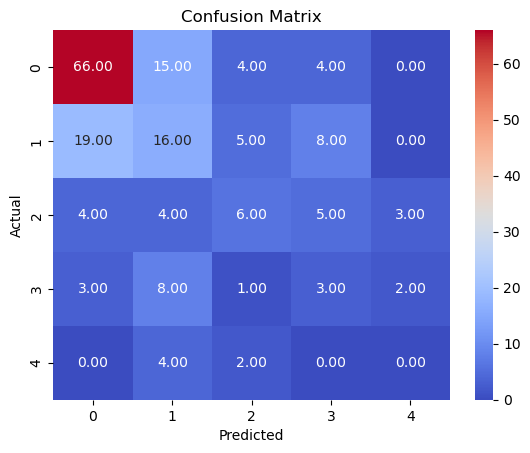

In [51]:
# Visualize the confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

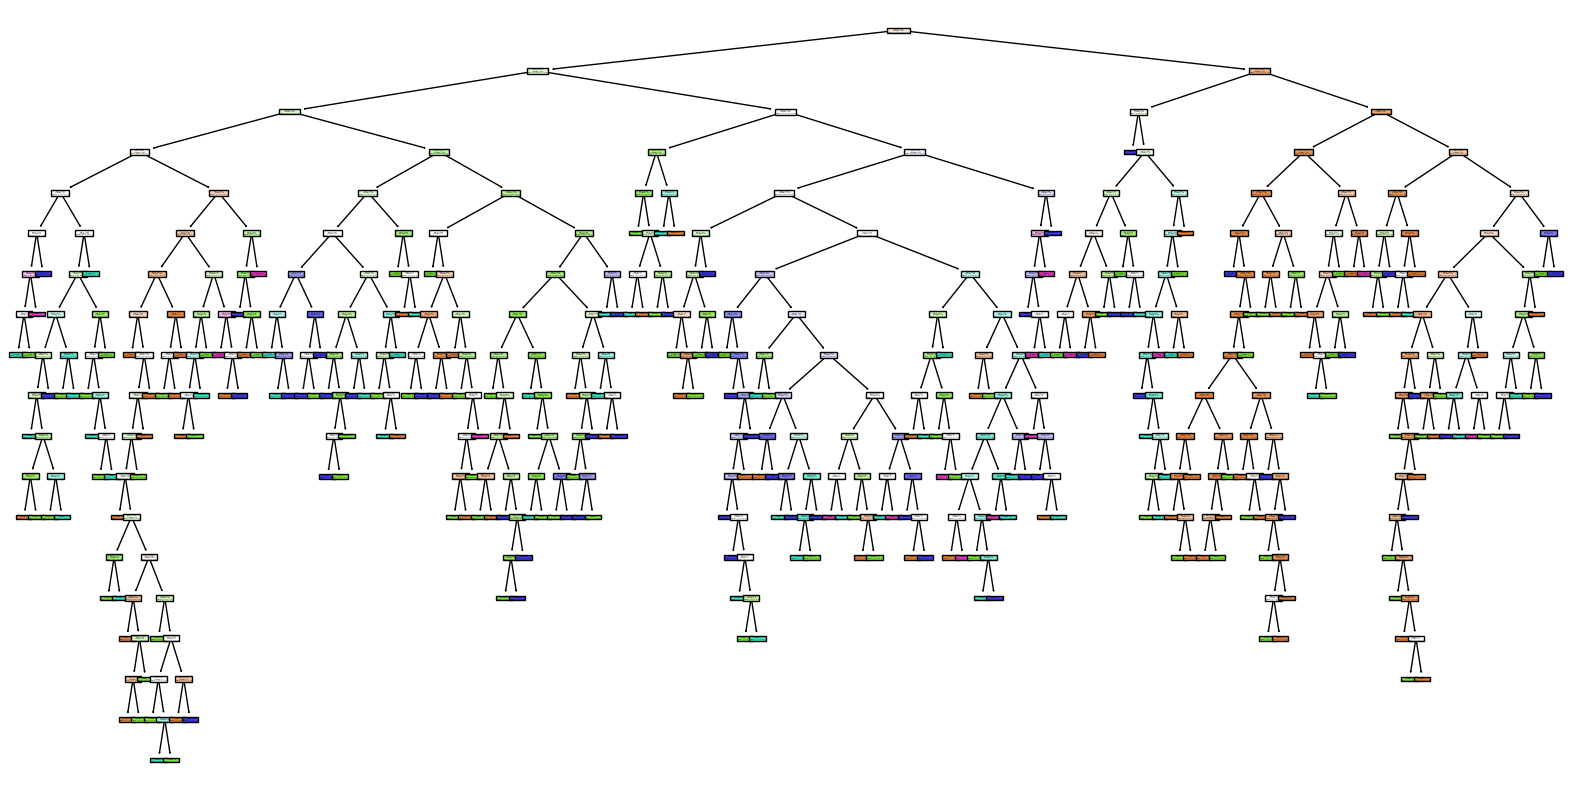

In [52]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names = x.columns)
plt.show()

In [54]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_dist = {"criterion":["gini","entropy"] , "max_depth":[1,2,3,4,5,6,7,8]}
grid = GridSearchCV(model, param_grid=param_dist, cv = 10, n_jobs=-1)

In [55]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)

In [57]:
grid.best_score_

0.53308599695586

In [58]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
# Interview Questions:

# 1. What are some common hyperparameters of decision tree models, and 
# how do they affect the model's performance?

# Non-learnable parameters are also called hyperparameters. 
# A hyperparameter is a parameter that is defined before the learning process begins and 
# it helps to control aspects of the learning process. 
# Examples of hyperparameters include the learning rate, regularization strength, and the 
# choice of optimization algorithm. When we define these hyperparameters, 
# the model can control the features of the learning process and possibly impact its 
# performance and behavior.

# Improved Performance
# Reduced Overfitting
# Enhanced Generalization
# Addressing Class Imbalance
# Tailoring the Model to Specific Tasks

In [ ]:
# 2. What is the difference between the Label encoding and One-hot encoding?

# LabelEncoder assigns a numerical label to each category
# OneHotEncoder creates a binary vector representation of the categorical data, 
# where each column represents a unique category